# Prophet Example

# Prophet Model 

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.It is designed to se automatically find a good set of hyperparameters for the model in an effort to make forrecast for time series with seasonality and trends. 

The Prophet model is not autoregressive, like ARIMA, exponential smoothing, and the other methods we study in a typical time series course (including my own).

The 3 components are:

1) The trend g(t) which can be either linear or logistic.

2) The seasonality s(t), modeled using a Fourier series.

3) The holiday component h(t), which is essentially a one-hot vector “dotted” with a vector of weights, each representing the contribution from their respective holiday.



In thie notebook, following concepts will coverd:
- Loading time-series
- EDA
- Preparing the data for modeling
- Implementing prophet model
- Evaluating the results 

-Data: https://www.kaggle.com/datasets/bobnau/daily-website-visitors
-Blog post:"                            "
-To get more information on Prophet in Scaleast :"                                  "


In [18]:
pip install scalecast


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster



sns.set(rc={'figure.figsize':(24,12)})

# Loading time series

In [32]:
data = pd.read_csv('daily-website-visitors.csv',parse_dates=['Date'])

In [33]:
data=data[['First.Time.Visits','Date']]

In [34]:
data

,First.Time.Visits,Date
0,1430,2014-09-14
1,2297,2014-09-15
2,2352,2014-09-16
3,2327,2014-09-17
4,2130,2014-09-18
...,...,...
2162,1373,2020-08-15
2163,1686,2020-08-16
2164,2181,2020-08-17
2165,2184,2020-08-18


# EDA

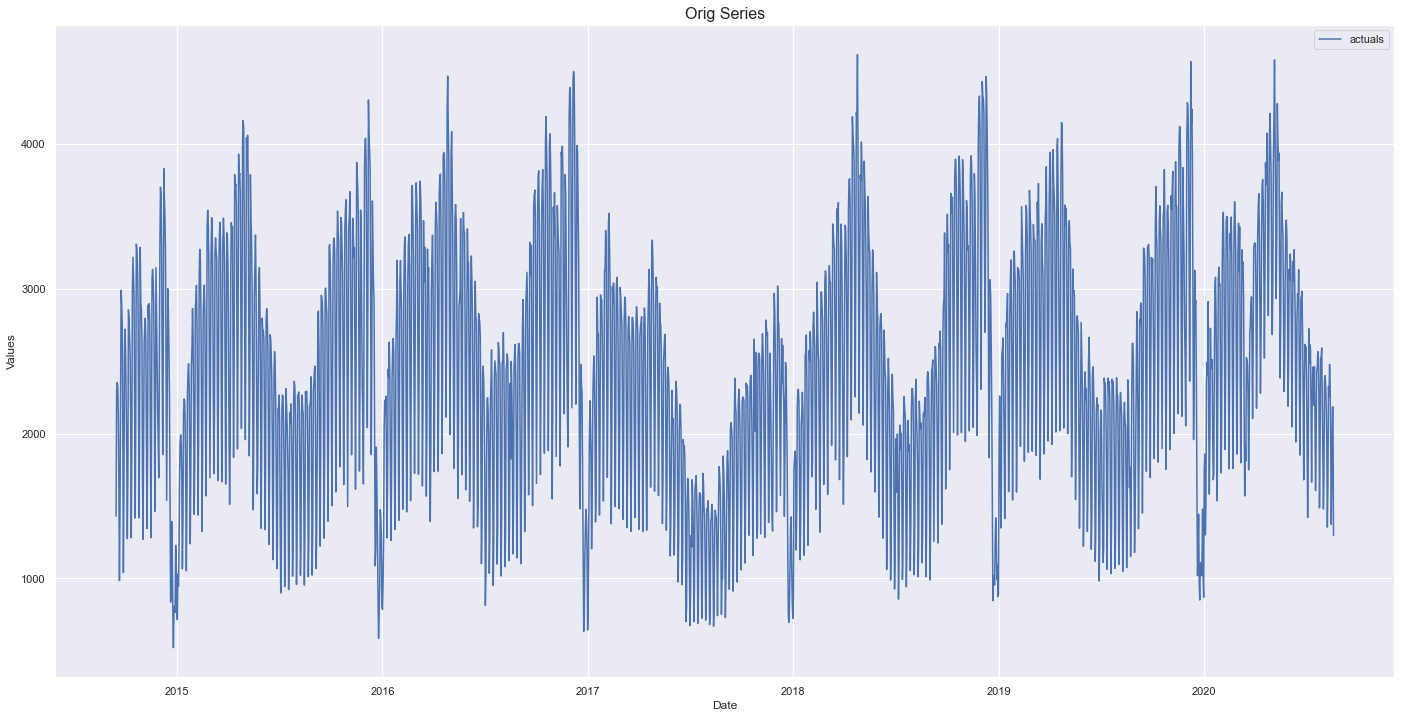

In [35]:
f=Forecaster(y=data['First.Time.Visits'],current_dates=data['Date'])
f.plot()
plt.title('Orig Series',size=16)
plt.show()

In [36]:
f

Forecaster(
    DateStartActuals=2014-09-14T00:00:00.000000000
    DateEndActuals=2020-08-19T00:00:00.000000000
    Freq=D
    N_actuals=2167
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
)

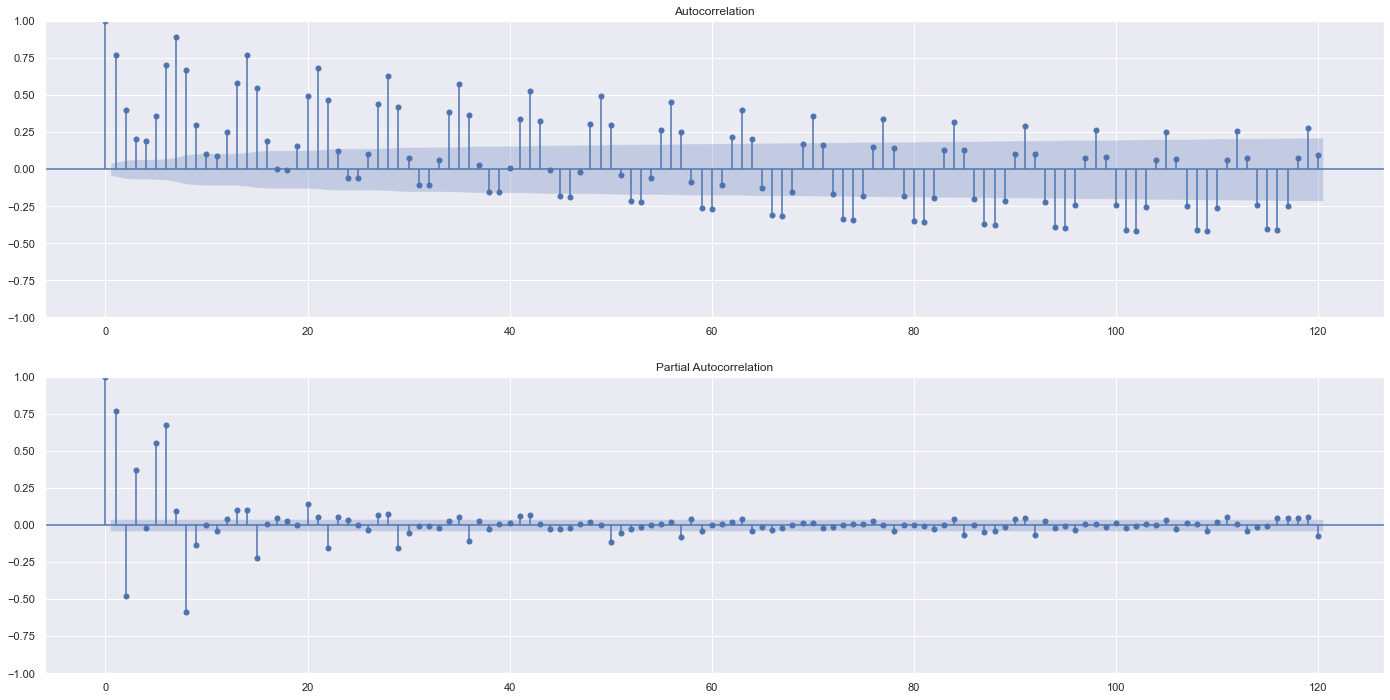

In [37]:
figs, axs = plt.subplots(2, 1)
f.plot_acf(ax=axs[0],lags=120)
f.plot_pacf(ax=axs[1],lags=120)
plt.show()

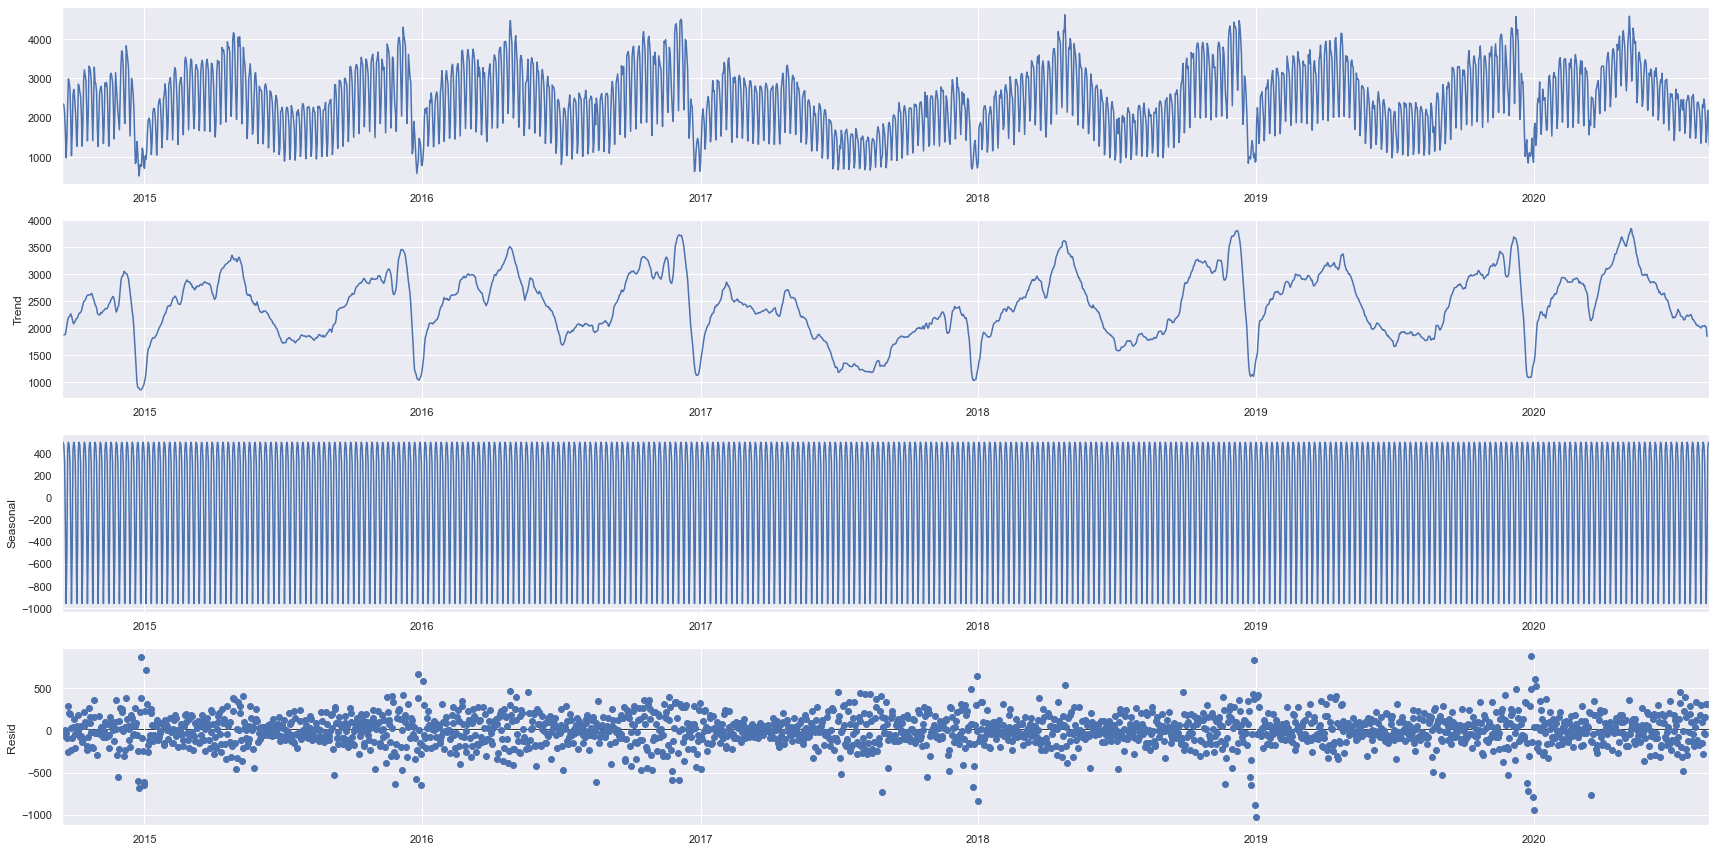

In [38]:
f.seasonal_decompose().plot()
plt.show()

ADF Test

In [39]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: -4.48
the p-value is 0.0002
the series is stationary
----------------------------------------------------------------------------------------------------


# Preparing the data for modeling

In [40]:
data.head()

,First.Time.Visits,Date
0,1430,2014-09-14
1,2297,2014-09-15
2,2352,2014-09-16
3,2327,2014-09-17
4,2130,2014-09-18


In [45]:
f.generate_future_dates(60)
f.set_test_length(650)
f.set_estimator('prophet')
f

Forecaster(
    DateStartActuals=2014-09-14T00:00:00.000000000
    DateEndActuals=2020-08-19T00:00:00.000000000
    Freq=D
    N_actuals=2167
    ForecastLength=60
    Xvars=[]
    Differenced=0
    TestLength=650
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=prophet
)

In [48]:
f.manual_forecast(call_me='prophet1')

In [54]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.relativedelta import relativedelta
from scalecast.Forecaster import Forecaster

In [55]:
matplotlib.use("nbAgg")
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

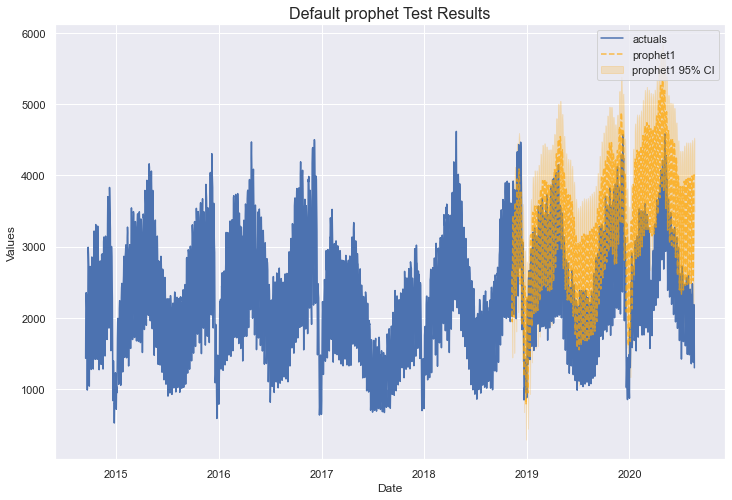

In [56]:
f.plot_test_set(ci=True,models='prophet1')
plt.title('Default prophet Test Results',size=16)
plt.show()

Load Object with Parameters and Regressors
Forecast length: 60 periods (two months)
Test length: 30%

